#K-Nearest Neighbors

Apa itu K-Nearest Neighbors (KNN)?

K-Nearest Neighbors (KNN) adalah salah satu algoritma supervised learning yang digunakan untuk klasifikasi dan regresi. Algoritma ini bekerja dengan cara:

1. Menghitung jarak antara data baru yang ingin diprediksi dengan data-data dalam dataset (biasanya menggunakan jarak Euclidean / Euclidean Distance).

2. Menentukan sejumlah k data terdekat (k-nearest neighbors) dari data baru tersebut.

3. Untuk klasifikasi, algoritma akan memberikan label kelas berdasarkan mayoritas label dari tetangga terdekat tersebut. Untuk regresi, nilai prediksi diambil dari rata-rata nilai tetangganya

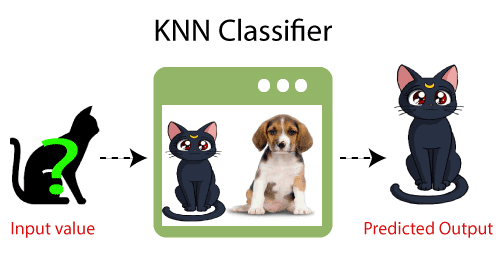

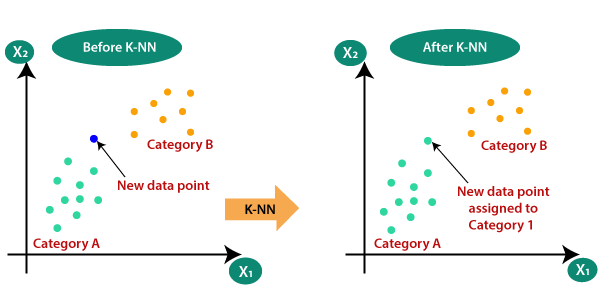

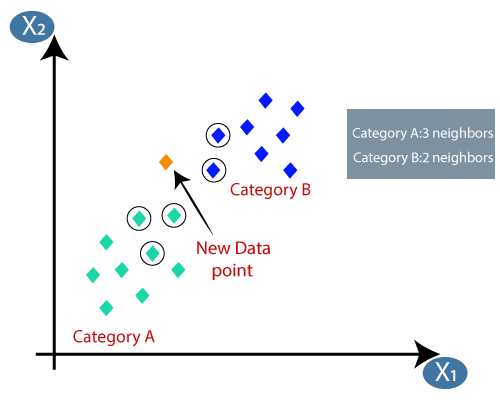

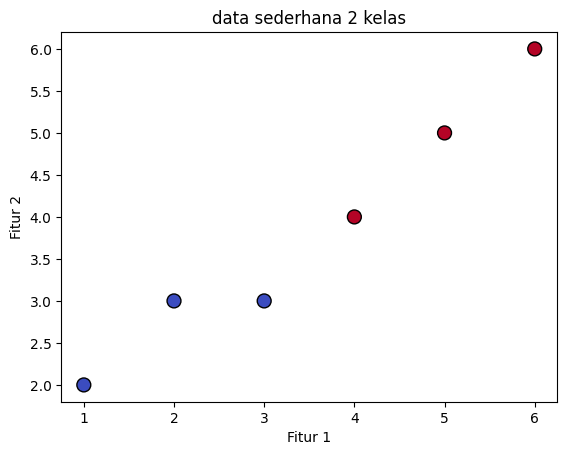

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

## buat data sederhana
x = np.array([[1,2],[2,3],[3,3],[4,4],[5,5],[6,6]]) #data point # Modified the last element to [6,6] for consistent shape
y = np.array([0,0,0,1,1,1]) #label

#visualisasi dataset
plt.scatter(x[:,0],x[:,1],c= y, cmap='coolwarm', s = 100, edgecolor= 'k', label = "Data points")
# c = y gambar titiknya punya warna sesuai kelas pada y, s adalah ukuran data point
plt.title('data sederhana 2 kelas')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.show()

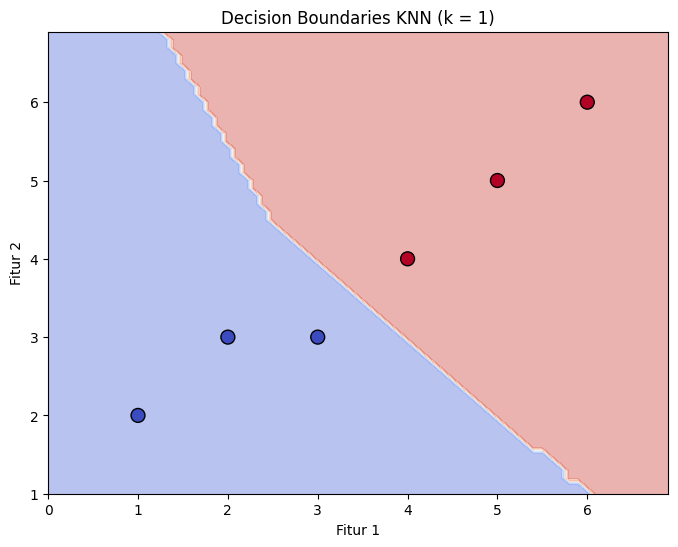

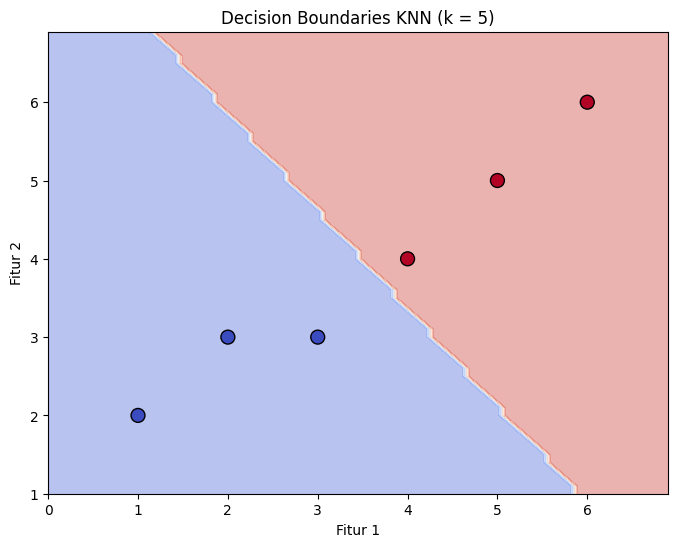

In [12]:
def plot_batas_knn(k):
    #Buat Classifier KNN

    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x,y)

    #buat grid untuk menampilkan batas keputusan (decision boundaries)
    x_min, x_max =x[:,0].min() - 1, x[:,0].max() + 1
    y_min, y_max =x[:,1].min() - 1, x[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min,x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))


    #Prediksi kelas untuk setiap titik di grid
    z = knn.predict(np.c_[xx.ravel(),yy.ravel()]) #mengubah array 2D jadi 1D, c_ untuk  combine
    z = z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, z, alpha=0.4, cmap='coolwarm')

    plt.scatter(x[:,0],x[:,1],c= y, cmap='coolwarm', s = 100, edgecolor= 'k', label = "Data points")
    plt.title(f'Decision Boundaries KNN (k = {k})')
    plt.xlabel('Fitur 1')
    plt.ylabel('Fitur 2')
    plt.show()

# untuk k = 1
plot_batas_knn(1)

plot_batas_knn(5)

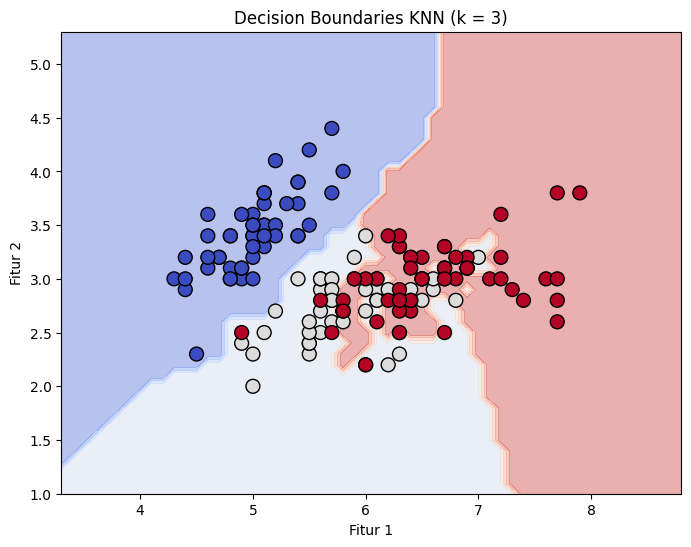

In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
x = iris.data[:,:2] #ambil dua fitur saja, yaitu sepal length dan sepal widh, agar visualisasi 2D
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

x_min, x_max =x[:,0].min() - 1, x[:,0].max() + 1
y_min, y_max =x[:,1].min() - 1, x[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min,x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))


    #Prediksi kelas untuk setiap titik di grid
z = knn.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, z, alpha=0.4, cmap='coolwarm')

plt.scatter(x[:,0],x[:,1],c= y, cmap='coolwarm', s = 100, edgecolor= 'k', label = "Data points")
plt.title(f'Decision Boundaries KNN (k = {3})')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.show()


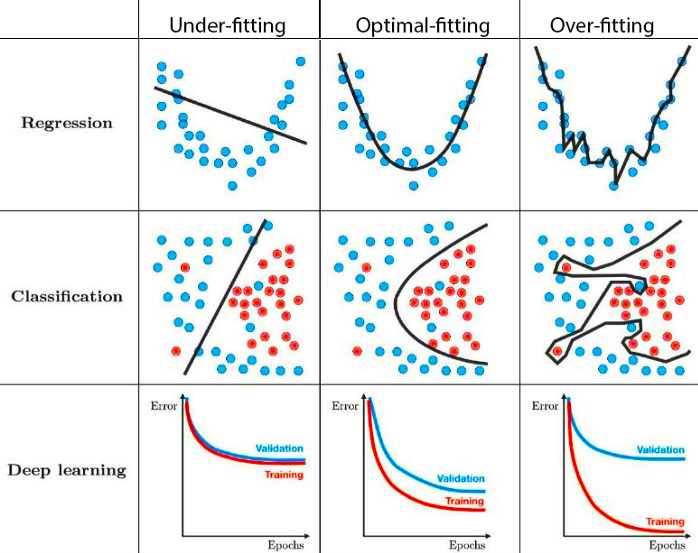

1. Generalzation yang Baik: Jlka akurasi model pada data latih dan data ujl cukup konsisten dan tidak terlalu berbeda, Inl adalah indikator bahwa model mampu mengeneralisasi dengan baik.
2. Overfittirng: Jka akurasl data latih sangattinggl (misalinya, >95%), tetapl akurasl data jauh leblih rendah (misalnya, <70%),Ini adalah tanda bahwa model mengalami overfitting. Model menghafal" data latih tetapi tidak mampu memprediksi dengan baik pada data baru.
3. Underfitting: Jlika akurasi data latih dan data uji sama-sama rendah (misalnya, keduanya <60%), model mengalami underfitting, yang berarti model terlalu sederhana dan tidak mampu menangkap pola dalam data.

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
x = iris.data[:,:2] #ambil dua fitur saja, yaitu sepal length dan sepal widh, agar visualisasi 2D
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

## Generalization

In [16]:
from sklearn.metrics import accuracy_score
#optimal case (k=5)
knn_optimal = KNeighborsClassifier(n_neighbors=5)

#train
knn_optimal.fit(x_train, y_train)
akurasi_optimal_train = accuracy_score(y_train, knn_optimal.predict(x_train)) # data training dan hasil prediksi
akurasi_optimal_test = accuracy_score(y_test, knn_optimal.predict(x_test)) # data testing
print(f"Good Generalization (k=5) - Training Accuracy: {akurasi_optimal_train * 100:.2f}%") #float 2 angka di belakang koma
print(f"Good Generalization (k=5) - Testing Accuracy: {akurasi_optimal_test * 100:.2f}%")

Good Generalization (k=5) - Training Accuracy: 81.67%
Good Generalization (k=5) - Testing Accuracy: 86.67%


##Overfitting

In [ ]:
from sklearn.metrics import accuracy_score
#optimal case (k=5)
knn_overfitting = KNeighborsClassifier(n_neighbors=1)

#train
knn_overfitting.fit(x_train, y_train)
akurasi_overfitting_train = accuracy_score(y_train, knn_overfitting.predict(x_train)) # data training dan hasil prediksi
akurasi_overfitting_test = accuracy_score(y_test, knn_overfitting.predict(x_test)) # data testing
print(f"Good Generalization (k=5) - Training Accuracy: {akurasi_overfitting_train * 100:.2f}%") #float 2 angka di belakang koma
print(f"Good Generalization (k=5) - Testing Accuracy: {akurasi_overfitting_test * 100:.2f}%")

Good Generalization (k=5) - Training Accuracy: 94.17%
Good Generalization (k=5) - Testing Accuracy: 66.67%


## Underfitting

In [18]:
from sklearn.metrics import accuracy_score
#optimal case (k=5)
knn_underfitting = KNeighborsClassifier(n_neighbors=120)

#train
knn_underfitting.fit(x_train, y_train)
akurasi_underfitting_train = accuracy_score(y_train, knn_underfitting.predict(x_train)) # data training dan hasil prediksi
akurasi_underfitting_test = accuracy_score(y_test, knn_underfitting.predict(x_test)) # data testing
print(f"Good Generalization (k=5) - Training Accuracy: {akurasi_underfitting_train * 100:.2f}%") #float 2 angka di belakang koma
print(f"Good Generalization (k=5) - Testing Accuracy: {akurasi_underfitting_test * 100:.2f}%")

Good Generalization (k=5) - Training Accuracy: 36.67%
Good Generalization (k=5) - Testing Accuracy: 20.00%


# Tugas

Gunakan data sklearn untuk breast cancer menggunakan KNN Classifier (ambil 2 fitur pertama saja), gunakan n_neighbor dengan jumlah 2 angka dari belakang di nim mahasiswa masing-masing (misal I.211195, maka n_neighbors=95)
<br>
Buat visualisasi decision boundraris dan sebutkan apakah hasil akurasinya good generalization, overfitting, atau underfitting.

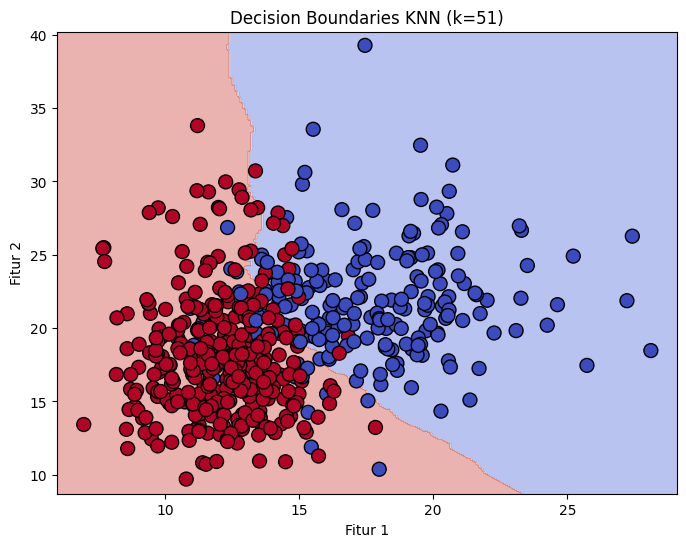

In [33]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
x = cancer.data[:,:2]
y = cancer.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
knn_cancer = KNeighborsClassifier(n_neighbors=51)

#train model
knn_cancer.fit(x_train, y_train)

#buat prediksi
y_pred = knn_cancer.predict(x_test)

x_min, x_max =x[:,0].min() - 1, x[:,0].max() + 1
y_min, y_max =x[:,1].min() - 1, x[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min,x_max, 0.1),
                       np.arange(y_min, y_max, 0.1))
#Prediksi kelas untuk setiap titik di grid
z = knn_cancer.predict(np.c_[xx.ravel(),yy.ravel()]) #mengubah array 2D jadi 1D, c_ untuk combine
z = z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, z, alpha=0.4, cmap='coolwarm')

plt.scatter(x[:,0],x[:,1],c = y, cmap='coolwarm',s =100, edgecolor='k',label="Data Points")
#c=y gambar titiknya punya warna sesuai kelas pada y, s adalah ukuran data point,
plt.title(f'Decision Boundaries KNN (k={51})')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.show()


In [34]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
x = cancer.data[:,:2]
y = cancer.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [35]:
from sklearn.metrics import accuracy_score

knn_cancer = KNeighborsClassifier(n_neighbors=51) # Nim Ghalih I.2310551

#train
knn_cancer.fit(x_train, y_train)
akurasi_train = accuracy_score(y_train, knn_cancer.predict(x_train)) # data training dan hasil prediksi
akurasi_test = accuracy_score(y_test, knn_cancer.predict(x_test)) # data testing
print(f"Good Generalization (k=51) - Training Accuracy: {akurasi_train * 100:.2f}%") #float 2 angka di belakang koma
print(f"Good Generalization (k=51) - Testing Accuracy: {akurasi_test * 100:.2f}%")

Good Generalization (k=51) - Training Accuracy: 92.31%
Good Generalization (k=51) - Testing Accuracy: 83.33%


### Hasil akurasi pada Neighbors = 51 masuk kedalam kategori Good Generalization karena data training dan data testing tidak terlalu jauh berbeda, Data training menunjukan akurasi 92.31% dan data testingnya 83.33%